In [72]:
!pip install pandas
!pip install numpy
!pip install seaborn
!pip install matplotlib

In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('TemperatureDataset.csv')
df.head()

,placeDcid,placeName,Date:Mean_Temperature,Value:Mean_Temperature,Source:Mean_Temperature
0,wikidataId/Q163239,Balochistan,2015-01,12.6363,https://cds.climate.copernicus.eu/cdsapp#!/dat...
1,wikidataId/Q163239,Balochistan,2015-02,16.5315,https://cds.climate.copernicus.eu/cdsapp#!/dat...
2,wikidataId/Q163239,Balochistan,2015-03,18.9016,https://cds.climate.copernicus.eu/cdsapp#!/dat...
3,wikidataId/Q163239,Balochistan,2015-04,26.9458,https://cds.climate.copernicus.eu/cdsapp#!/dat...
4,wikidataId/Q163239,Balochistan,2015-05,31.2165,https://cds.climate.copernicus.eu/cdsapp#!/dat...


In [3]:

df.dtypes

placeDcid                   object
placeName                   object
Date:Mean_Temperature       object
Value:Mean_Temperature     float64
Source:Mean_Temperature     object
dtype: object

In [4]:
df.drop(columns = ['placeDcid','Source:Mean_Temperature'], inplace = True)
df.rename(columns = {'placeName':'Place','Date:Mean_Temperature':'Date','Value:Mean_Temperature':'Mean Temperature'},inplace = True)
df['Year'] = pd.to_datetime(df['Date'],format = 'mixed')
df['Year'] = df['Year'].dt.year
df

,Place,Date,Mean Temperature,Year
0,Balochistan,2015-01,12.6363,2015
1,Balochistan,2015-02,16.5315,2015
2,Balochistan,2015-03,18.9016,2015
3,Balochistan,2015-04,26.9458,2015
4,Balochistan,2015-05,31.2165,2015
...,...,...,...,...
193,Islamabad Capital Territory,2020-02,13.3295,2020
194,Islamabad Capital Territory,2020-03,15.7465,2020
195,Islamabad Capital Territory,2020-04,20.6984,2020
196,Islamabad Capital Territory,2020-05,25.4758,2020


In [5]:
df_grouped = df.groupby(['Place','Year'], as_index = False)['Mean Temperature'].mean()
df_grouped.head(30)

,Place,Year,Mean Temperature
0,Balochistan,2015,24.018850
1,Balochistan,2016,24.581642
2,Balochistan,2017,24.237775
3,Balochistan,2018,24.609775
4,Balochistan,2019,23.829183
5,Balochistan,2020,22.510133
6,Islamabad Capital Territory,2015,20.344300
7,Islamabad Capital Territory,2016,21.604908
8,Islamabad Capital Territory,2017,21.227483
9,Islamabad Capital Territory,2018,20.915017


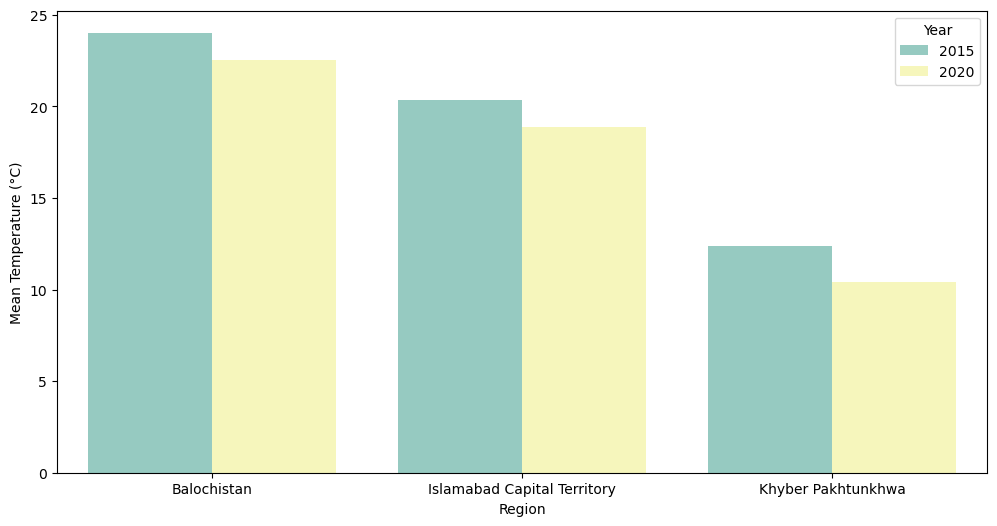

In [10]:
df_years = df_grouped[df_grouped['Year'].isin([2015,2020])]
plt.figure(figsize=(12, 6))
sns.barplot(x = 'Place', y = 'Mean Temperature', hue = 'Year', data = df_years, palette = 'Set3')
plt.xlabel('Region')
plt.ylabel('Mean Temperature (°C)')
plt.savefig("BarChart1.png", bbox_inches='tight')

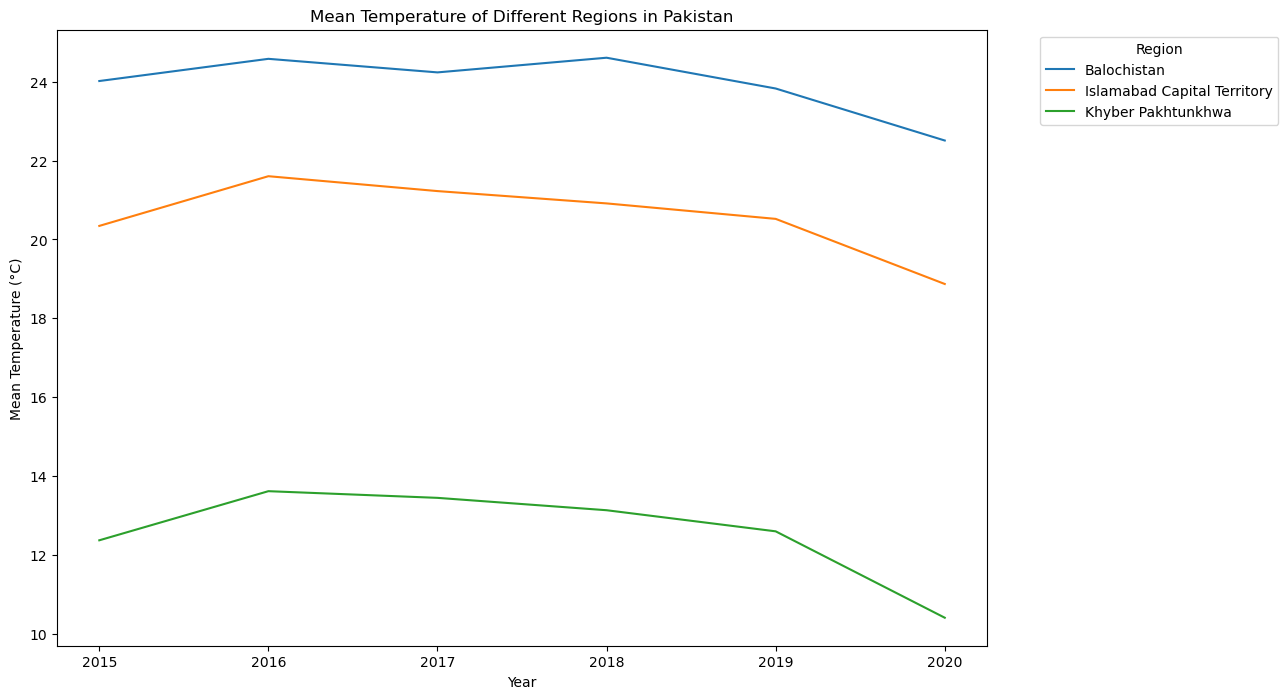

In [31]:
#df_line = df.groupby('Year')['Mean Temperature'].mean().reset_index()
plt.figure(figsize =(12,8))
plt.ylabel('Mean Temperature (°C)')
plt.title('Mean Temperature of Different Regions in Pakistan')
sns.lineplot(x = 'Year', y = 'Mean Temperature', data = df_grouped, hue = 'Place')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.savefig('LineGraph2.png', bbox_inches='tight')

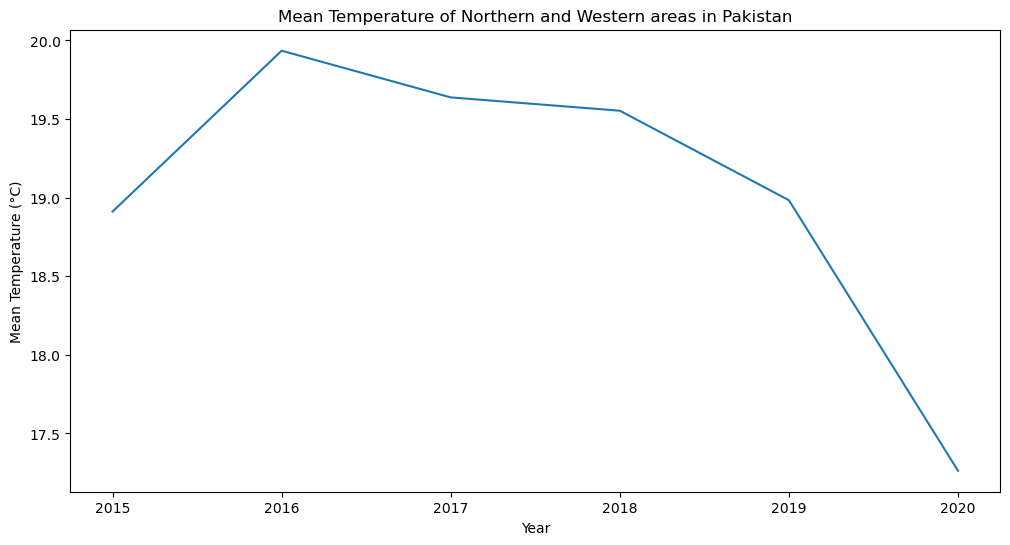

In [29]:
df_line = df.groupby('Year')['Mean Temperature'].mean().reset_index()
plt.figure(figsize =(12,6))
plt.ylabel('Mean Temperature (°C)')
plt.title('Mean Temperature of Northern and Western areas in Pakistan')
sns.lineplot(x = 'Year', y = 'Mean Temperature', data = df_line)
plt.savefig('LineGraph1.png', bbox_inches='tight')

In [95]:
df_grouped

,Place,Year,Mean Rainfall
0,Baltistan Division,2001,0.887260
1,Baltistan Division,2002,0.887260
2,Baltistan Division,2003,6.682632
3,Baltistan Division,2005,0.032588
4,Baltistan Division,2006,0.072571
...,...,...,...
658,Sukkur Division,2020,17.666386
659,Sukkur Division,2021,1.187709
660,Sukkur Division,2022,30.217871
661,Sukkur Division,2023,8.151761
